## Cleanning Text

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import string
import re
import nltk

In [2]:
text= "If you were the NWS wth a rotating storm w/ a report of a 'HUGE' / 'MASSIVE' / 'VIOLENT' tornado what would you do? https://t.co/J3dI85IST5"

In [3]:
text

"If you were the NWS wth a rotating storm w/ a report of a 'HUGE' / 'MASSIVE' / 'VIOLENT' tornado what would you do? https://t.co/J3dI85IST5"

In [4]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
text_dn = re.sub(r'https?:\/\/.*[\r\n]*','',text)

In [6]:
text_dn

"If you were the NWS wth a rotating storm w/ a report of a 'HUGE' / 'MASSIVE' / 'VIOLENT' tornado what would you do? "

In [7]:
text_dn.lower()

"if you were the nws wth a rotating storm w/ a report of a 'huge' / 'massive' / 'violent' tornado what would you do? "

In [8]:
text_p = "".join([char for char in text_dn.lower() if char not in string.punctuation])

In [9]:
text_p

'if you were the nws wth a rotating storm w a report of a huge  massive  violent tornado what would you do '

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
from nltk import word_tokenize

words = word_tokenize(text_p)

In [14]:
words

['if',
 'you',
 'were',
 'the',
 'nws',
 'wth',
 'a',
 'rotating',
 'storm',
 'w',
 'a',
 'report',
 'of',
 'a',
 'huge',
 'massive',
 'violent',
 'tornado',
 'what',
 'would',
 'you',
 'do']

In [15]:
filtered_words = [word for word in words if word not in stop_words]

In [16]:
filtered_words

['nws',
 'wth',
 'rotating',
 'storm',
 'w',
 'report',
 'huge',
 'massive',
 'violent',
 'tornado',
 'would']

In [17]:
from nltk.corpus.reader import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [18]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer ()

In [19]:
lemmatized = [lemmatizer.lemmatize(word) for word in filtered_words]

In [20]:
lemmatizer

<WordNetLemmatizer>

In [21]:
from nltk.stem.porter import PorterStemmer

In [22]:
porter = PorterStemmer()

In [23]:
stemmed = [porter.stem(word)for word in filtered_words]
stemmed

['nw',
 'wth',
 'rotat',
 'storm',
 'w',
 'report',
 'huge',
 'massiv',
 'violent',
 'tornado',
 'would']

In [24]:
lemmatizer.lemmatize('crying')

'cry'

## Sentiment Analysis using TF and KERAS

In [25]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow import keras

In [26]:
tfds

<module 'tensorflow_datasets' from '/usr/local/lib/python3.7/dist-packages/tensorflow_datasets/__init__.py'>

In [27]:
train_data, validation_data, test_data = tfds.load(
    name = "imdb_reviews",
    split = ("train[:60%]", "train[60%:]", "test"),
    as_supervised = True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteCBAVJQ/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteCBAVJQ/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteCBAVJQ/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [28]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [29]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(10)))

In [30]:
train_examples_batch, train_labels_batch

(<tf.Tensor: shape=(10,), dtype=string, numpy=
 array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
        b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fe

In [31]:
train_examples_batch

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell 

In [32]:
train_labels_batch

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])>

In [33]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [34]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"

In [35]:
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable = True)

In [36]:
train_examples_batch.dtype

tf.string

In [37]:
hub_layer(train_examples_batch[:1])

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ]],
      dtype=float32)>

In [38]:
validation_data

<PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

##Building a Model in Keras

In [39]:
model = keras.Sequential()
model.add(hub_layer)
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 20)                400020    
                                                                 
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [43]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=20,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


30/30 [==============================] - 4s 94ms/step - loss: 1.2071 - accuracy: 0.4859 - val_loss: 0.8370 - val_accuracy: 0.5352
Epoch 2/20
30/30 [==============================] - 3s 89ms/step - loss: 0.7403 - accuracy: 0.5671 - val_loss: 0.6684 - val_accuracy: 0.6243
Epoch 3/20
30/30 [==============================] - 3s 90ms/step - loss: 0.6373 - accuracy: 0.6429 - val_loss: 0.6109 - val_accuracy: 0.6721
Epoch 4/20
30/30 [==============================] - 3s 86ms/step - loss: 0.5856 - accuracy: 0.6909 - val_loss: 0.5715 - val_accuracy: 0.7037
Epoch 5/20
30/30 [==============================] - 3s 86ms/step - loss: 0.5459 - accuracy: 0.7263 - val_loss: 0.5385 - val_accuracy: 0.7306
Epoch 6/20
30/30 [==============================] - 3s 87ms/step - loss: 0.5106 - accuracy: 0.7523 - val_loss: 0.5102 - val_accuracy: 0.7521
Epoch 7/20
30/30 [==============================] - 3s 87ms/step - loss: 0.4793 - accuracy: 0.7770 - val_loss: 0.4839 - val_accuracy: 0.7753
Epoch 8/20
30/30 [======

In [44]:
test_data

<PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [45]:
results = model.evaluate(test_data.batch(512), verbose=2)

49/49 - 2s - loss: 0.3245 - accuracy: 0.8592 - 2s/epoch - 49ms/step


In [46]:
model.predict(["I loved it"])

array([[0.93794763]], dtype=float32)

In [47]:
test_text = "I think this was a glorious piece of art"
#test_text = "I think this was a glorious piece of crap"

In [48]:
(model.predict([test_text])>0.5).astype('int32')

array([[1]], dtype=int32)

In [49]:
import os
import seaborn as sns
from numpy.linalg import norm

In [50]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

In [51]:
model = hub.load(module_url)

In [52]:
def cos_sim(a, b):
  return np.inner(a,b)/(norm(a)*norm(b))

def embed(input):
  return model(input)
  

In [53]:
word="elephant"
sentence= "This is my sentence there are many like it but this is mine"
paragraph=(
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")

messages = [word, sentence, paragraph]

message_embeddings=embed(messages)

In [54]:
for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_snippet =", ".join((str(x) for x in message_embedding[:7]))
  print("Embedding: [{},...]\n".format(message_snippet))

Message: elephant
Embedding size: 512
Embedding: [0.008344486355781555, 0.00048085825983434916, 0.06595248728990555, -0.01971263810992241, 0.03570082038640976, 0.03658927232027054, 0.03706124797463417,...]

Message: This is my sentence there are many like it but this is mine
Embedding size: 512
Embedding: [-0.02862446755170822, 0.024199042469263077, -0.011388511396944523, 0.03102964162826538, -0.061761774122714996, 0.022589903324842453, 0.0016719469567760825,...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [-0.028332693502306938, -0.0558621808886528, -0.012941480614244938, -0.0032210987992584705, -0.07933777570724487, -0.017642222344875336, 0.04226500540971756,...]



In [55]:
messages = [
            #Cars
            "Elephant",
            "Large Mammal with tusks and a large trunk",
            "Bear",
            "Whale",
            "fish",

            #Computers
            "I wish I had a faster video card",
            "my QWERTY keyboards is faulty",
            "I have a fast Graphics card",
            "I have a slow gtx card",

            #Weather

            "There is a cold front coming",
            "Winter is Here!",
            "I wish it would snow",
            "Did the groundhog see it's shadow?",

            #Misc
            "Buffalo Buffalo, Buffalo,  Buffalo...",
            "May the Farce be with you",
            "I'm a Mog",
            "I'm my own best friend",
]

In [56]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

In [57]:
def plot_cos_similarity(labels, features,rotation):
  corr = cos_sim(features,features)*10
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels,rotation=rotation)
  g.set_title("Semantic Textual Similiarity")

In [58]:
def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

In [59]:
def run_and_plot_cos(messages_):
  message_embeddings_=embed(messages_)
  plot_cos_similarity(messages_,message_embeddings_,90)

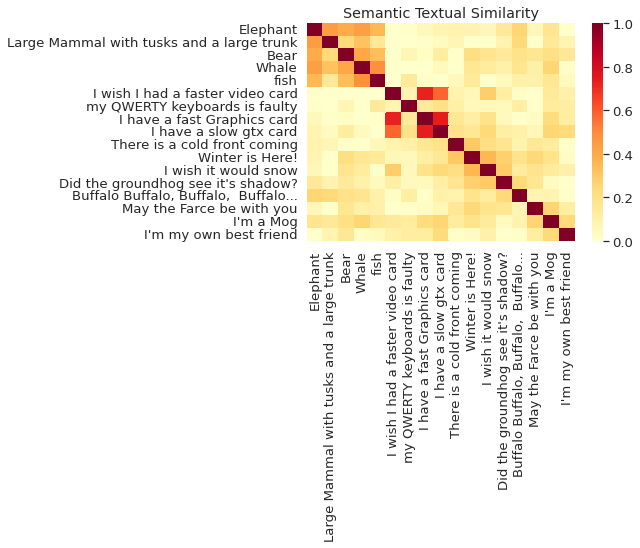

In [60]:
run_and_plot(messages)

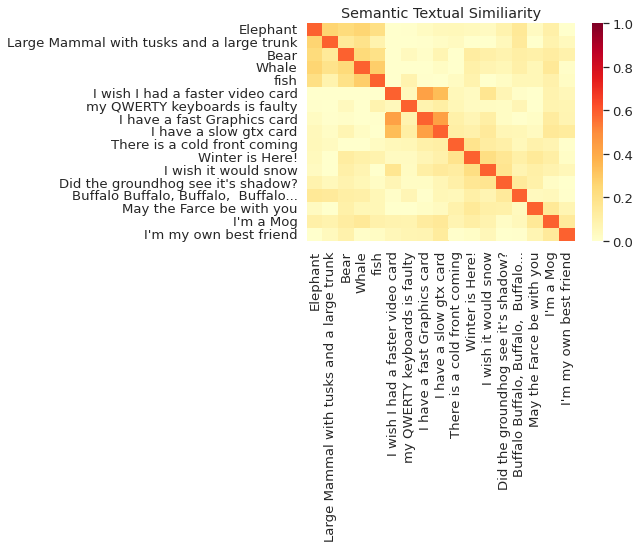

In [61]:
run_and_plot_cos(messages)